In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

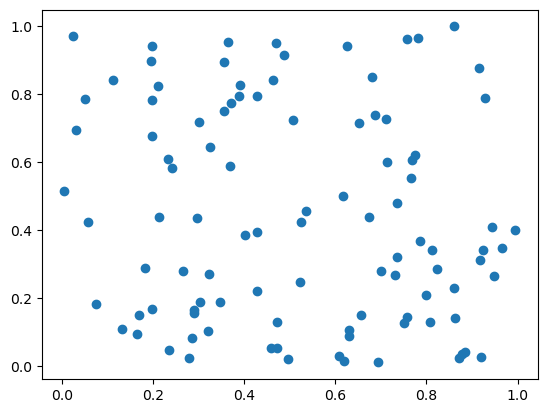

In [55]:
p = np.random.rand(100, 2)
plt.scatter(x = p[:, 0], y = p[:, 1])

In [56]:
from scipy.spatial import distance_matrix

d = distance_matrix(p, p)

idx = set()
stream_size = 10
temperature = 10

while len(idx) < stream_size:
    retries = np.random.randint(0, temperature)
    d_copy = d.copy()
    for _ in range(retries):
        i, j = np.unravel_index(d_copy.argmax(), d.shape)
        d_copy[i, j] = -1
        d_copy[j, i] = -1
    idx.add(i)
    idx.add(j)
    d[i, j] = -1
    d[j, i] = -1

idx = np.array(list(idx))

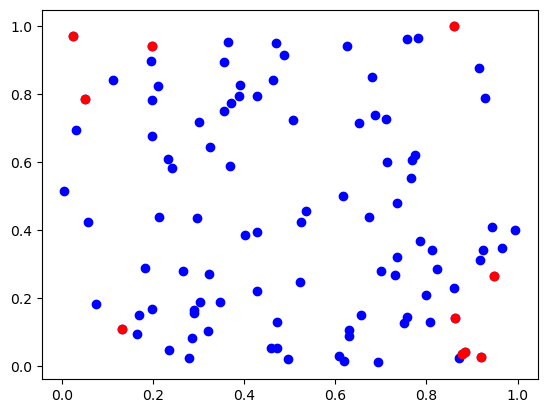

In [57]:
stream_items = p[idx]
plt.scatter(x = p[:, 0], y = p[:, 1], color='blue')
plt.scatter(x = stream_items[:, 0], y = stream_items[:, 1], color='red')

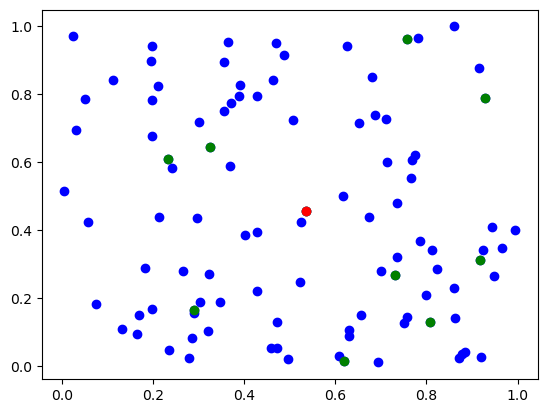

In [89]:
from scipy.spatial import distance_matrix

d = distance_matrix(p, p)

idx_set = set()
free_idx_set = set(range(p.shape[0]))
stream_size = 10
temperature = 10

coords = np.array([[0.5, 0.5]])
d0 = distance_matrix(coords, p)
nearest_idx = d0.argmin()
idx_set.add(nearest_idx)
nearest_item = p[nearest_idx]

while len(idx_set) < stream_size:
    idx = np.array(list(idx_set))
    free_idx = np.array(list(free_idx_set))
    d = distance_matrix(p[idx], p[free_idx])
    d_copy = d.copy()
    for _ in range(temperature):
        i, j = np.unravel_index(d_copy.argmax(), d_copy.shape)
        d_copy[i, j] = -1
    i, j = np.unravel_index(d_copy.argmax(), d_copy.shape)
    d[i, j] = -1
    idx_set.add(i)
    idx_set.add(j)
    if i in free_idx_set:
        free_idx_set.remove(i)
    if j in free_idx_set:
        free_idx_set.remove(j)

idx = np.array(list(idx_set))
stream_items = p[idx]
plt.scatter(x = p[:, 0], y = p[:, 1], color='blue')
plt.scatter(x = stream_items[:, 0], y = stream_items[:, 1], color='green')
plt.scatter(x = nearest_item[0], y = nearest_item[1], color='red')

### Привожу таблицы к единому виду

In [37]:
import pickle

with open('PlacesDatabase/food_places.pb', 'rb') as f:
    food_embeddings = pickle.load(f)

food_embeddings.shape

(20810, 384)

In [48]:
food = pd.read_csv('PlacesDatabase/food_places_raw.csv')
food_dict = defaultdict(list)

for i, row in enumerate(food.itertuples()):
    food_dict['name'].append(row.name)
    food_dict['address'].append(row.address)
    food_dict['lon'].append(row.lon)
    food_dict['lat'].append(row.lat)

food_df = pd.DataFrame(food_dict)
food_df.to_csv('PlacesDatabase/food_places.csv')

In [49]:
tmp = pd.read_csv('PlacesDatabase/food_places.csv')
for row in tmp.itertuples():
    print(type(row.embedding_diego))
    break

<class 'str'>


In [ ]:
with open('PlacesDatabase/shop_places.pb', 'rb') as f:
    shop_embeddings = pickle.load(f)

shop_embeddings.shape

In [34]:
shops = pd.read_csv('PlacesDatabase/shopping_v1.csv')
shops_dict = defaultdict(list)

for row in shops.itertuples():
    geo_data = row.geoData
    coords = geo_data.split(']')[0].split('[')[1].split(',')
    lon, lat = coords[0], coords[1]
    shops_dict['name'].append(row.Наименование)
    shops_dict['address'].append(row.Адрес)
    shops_dict['lon'].append(lon)
    shops_dict['lat'].append(lat)

shops_df = pd.DataFrame(shops_dict)
shops_df.to_csv('PlacesDatabase/shop_places.csv')

In [4]:
shops['Наименование']

0        Одежда. Обувь. Промтовары
1                          АЙКОВЕР
2                      Точка любви
3         Магазин Выпечка, пекарня
4                            Togas
                   ...            
65216                     Re-store
65217                Хмель и солод
65218            Всеинструменты.ру
65219                    Пятерочка
65220                 Красная икра
Name: Наименование, Length: 65221, dtype: object

In [6]:
shops['Адрес']

0                      город Москва, Беговая аллея, дом 3А
1        город Москва, Новослободская улица, дом 50/1, ...
2             город Москва, Ленинградский проспект, дом 12
3              город Москва, улица Даниловский Вал, дом 10
4        город Москва, Мичуринский проспект, дом 22, ко...
                               ...                        
65216            город Москва, Автозаводская улица, дом 18
65217    город Москва, улица Паустовского, дом 6, корпус 1
65218    город Москва, поселение Десеновское, Нововатут...
65219    Российская Федерация, город Москва, внутригоро...
65220    город Москва, Бирюлёвская улица, дом 51, корпус 1
Name: Адрес, Length: 65221, dtype: object

### Стоража

In [12]:
import os

uir_1 = (123, 456, 1)
uir_2 = (123, 457, 1)
uir_3 = (123, 458, -1)
uir_4 = (234, 456, -1)
uir_5 = (234, 458, 1)

def uir_to_str(uir):
    u, i, r = uir
    return f'{u}_{i}_{r}'

filename = 'storage/history'
if os.path.exists(filename):
    m = 'a'
else:
    m = 'w'

with open('storage/history', m) as f:
    f.write(uir_to_str(uir_1) + '\n')
    f.write(uir_to_str(uir_2) + '\n')
    f.write(uir_to_str(uir_3) + '\n')
    f.write(uir_to_str(uir_4) + '\n')
    f.write(uir_to_str(uir_5) + '\n')

Трансформер

In [13]:
! pip install -U sentence-transformers

Looking in indexes: https://pypi.yandex-team.ru/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 50.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=68bbd3e17b9ff253ee4c24f2a45a3c2c0d69383fea3a21e22e73785bf340672f
  Stored in directory: /home/bicdan22/.cache/pip/wheels/19/18/24/835e15d7f2958c2c616d1d5d35b7682b2c932ccc8aa9e6776b
Successfully built sentence-transformers


In [23]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

In [24]:
sentences = ['МГУ Столовая', 'Шаурма Раменки', 'Донер Университет', 'KFC проспект Вернадского']
embeddings = normalize(model.encode(sentences))

In [25]:
embeddings

array([[-0.01070358,  0.00745825, -0.00999787, ...,  0.01528956,
        -0.02072441, -0.06143075],
       [ 0.00285815,  0.09119575, -0.00500543, ...,  0.00663279,
        -0.03606554, -0.05205929],
       [ 0.00547829,  0.0532328 , -0.00642823, ..., -0.00962343,
         0.01076127, -0.06469654],
       [ 0.04954793,  0.0348621 , -0.00332802, ...,  0.00941507,
        -0.06433318, -0.07264632]], dtype=float32)

In [26]:
embeddings @ embeddings.T

array([[1.0000001 , 0.41088763, 0.8437072 , 0.6477397 ],
       [0.41088763, 0.99999976, 0.29203358, 0.15788585],
       [0.8437072 , 0.29203358, 0.99999994, 0.73020005],
       [0.6477397 , 0.15788585, 0.73020005, 1.0000001 ]], dtype=float32)

In [15]:
x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
list({k: v for k, v in sorted(x.items(), key=lambda item: -item[1])}.keys())

[3, 4, 1, 2, 0]